### Import Data ###

In [11]:
import pandas as pd

# Load data 
initial_df = pd.read_csv("adult/adult.csv")
initial_df.head()

# df.shape

initial_df.columns = ['age','workclass','fnlwgt','education','education_num','maritial_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','nativecountry','Salary']


df =  initial_df.copy(deep=True)
initial_df.head()


,age,workclass,fnlwgt,education,education_num,maritial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,nativecountry,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Handling Missing Data ###

In [12]:
# df.isnull().sum()

# Replace missing values in 'workclass' and 'occupation' with the mode
df['workclass'].replace('?', df['workclass'].mode()[0], inplace=True)
df['occupation'].replace('?', df['occupation'].mode()[0], inplace=True)

df.head()

count_str = df['nativecountry'].str.contains('?', regex=False).sum()
print("Native Country columns matches ", count_str, "?")

df_cleaned = df[~df['nativecountry'].str.contains('?', regex=False)]
df_cleaned.head()




Native Country columns matches  583 ?


C:\Users\DELL\AppData\Local\Temp\ipykernel_9224\1373271990.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].replace('?', df['workclass'].mode()[0], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9224\1373271990.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

,age,workclass,fnlwgt,education,education_num,maritial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,nativecountry,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Encoding Categorical Data ###

In [13]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encoding for categorical columns
categorical_cols = ['sex', 'workclass', 'education', 'maritial_status', 'occupation', 'relationship', 'race', 'nativecountry']
df_cleaned_enc = pd.get_dummies(df_cleaned, columns=categorical_cols)
# Label encoding for Salary column
label_encoder = LabelEncoder()
df_cleaned_enc['Salary'] = label_encoder.fit_transform(df_cleaned_enc['Salary'])


In [14]:
df_cleaned_enc.head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,Salary,sex_ Female,sex_ Male,workclass_ ?,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,50,83311,13,0,0,13,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,38,215646,9,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,53,234721,7,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,28,338409,13,0,0,40,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,37,284582,14,0,0,40,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False


### Data Normalization ###

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize 'hours-per-week' and 'capital-gain'
scaler = MinMaxScaler()
df_cleaned_enc[['hours_per_week', 'capital_gain']] = scaler.fit_transform(df_cleaned_enc[['hours_per_week', 'capital_gain']])

# Standardize 'age' column
standard_scaler = StandardScaler(with_mean=True, with_std=True)
df_cleaned_enc['age'] = standard_scaler.fit_transform(df_cleaned_enc[['age']])

print("MEAN: ", round( df_cleaned_enc['age'].mean(),4),"STD: ", round(df_cleaned_enc['age'].std(),4) )
df_cleaned_enc.head()


MEAN:  0.0 STD:  1.0


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,Salary,sex_ Female,sex_ Male,workclass_ ?,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,0.835962,83311,13,0.0,0,0.122449,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,-0.042381,215646,9,0.0,0,0.397959,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,1.055548,234721,7,0.0,0,0.397959,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,-0.774334,338409,13,0.0,0,0.397959,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.115576,284582,14,0.0,0,0.397959,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False


### Feature Engineering ###

In [17]:
# Create a new feature 'capital_gain_loss_ratio'
df_cleaned_enc['capital_gain_to_capital_loss'] = df_cleaned_enc['capital_gain'] / (df_cleaned_enc['capital_loss'] + 1)

# Binarize 'hours-per-week'
df_cleaned_enc['hours_per_week_binarized'] = df_cleaned_enc['hours_per_week'].apply(lambda x: 1 if x > 40 else 0)

df_cleaned_enc.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,Salary,sex_ Female,sex_ Male,workclass_ ?,...,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,capital_gain_to_capital_loss,hours_per_week_binarized
0,0.835962,83311,13,0.0,0,0.122449,0,False,True,False,...,False,False,False,False,False,True,False,False,0.0,0
1,-0.042381,215646,9,0.0,0,0.397959,0,False,True,False,...,False,False,False,False,False,True,False,False,0.0,0
2,1.055548,234721,7,0.0,0,0.397959,0,False,True,False,...,False,False,False,False,False,True,False,False,0.0,0
3,-0.774334,338409,13,0.0,0,0.397959,0,True,False,False,...,False,False,False,False,False,False,False,False,0.0,0
4,-0.115576,284582,14,0.0,0,0.397959,0,True,False,False,...,False,False,False,False,False,True,False,False,0.0,0


### Data Cleaning and Integration ###

In [18]:
# Remove duplicates
df_cleaned_enc.drop_duplicates(inplace=True)

# Standardize inconsistent entries in the 'native-country' column
df_cleaned_enc.columns  = [x.lower() for x in df_cleaned_enc.columns]
df_cleaned_enc.head()
# df_cleaned_enc.shape



,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,salary,sex_ female,sex_ male,workclass_ ?,...,nativecountry_ scotland,nativecountry_ south,nativecountry_ taiwan,nativecountry_ thailand,nativecountry_ trinadad&tobago,nativecountry_ united-states,nativecountry_ vietnam,nativecountry_ yugoslavia,capital_gain_to_capital_loss,hours_per_week_binarized
0,0.835962,83311,13,0.0,0,0.122449,0,False,True,False,...,False,False,False,False,False,True,False,False,0.0,0
1,-0.042381,215646,9,0.0,0,0.397959,0,False,True,False,...,False,False,False,False,False,True,False,False,0.0,0
2,1.055548,234721,7,0.0,0,0.397959,0,False,True,False,...,False,False,False,False,False,True,False,False,0.0,0
3,-0.774334,338409,13,0.0,0,0.397959,0,True,False,False,...,False,False,False,False,False,False,False,False,0.0,0
4,-0.115576,284582,14,0.0,0,0.397959,0,True,False,False,...,False,False,False,False,False,True,False,False,0.0,0


In [19]:
import random
default = ['car', 'bike']
i = 0
#df_dummy = pd.DataFrame([[ str(random.choice(default)), str(i + j)] for j in range(df_cleaned_enc.shape[0])], columns=[ "ID", "vehicle"])
df_dummy = pd.DataFrame([[str(random.choice(default)), str(i + j)] for j in range(df_cleaned_enc.shape[0])], columns=["ID", "vehicle"])
df_dummy.head()

df_dummy.dtypes

ID         object
vehicle    object
dtype: object

In [ ]:

# Merging additional data
df1 = pd.merge(df_cleaned_enc, df_dummy, how='center', left_index=True, right_on='ID')


### Exploratory Data Analysis (EDA) ###

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


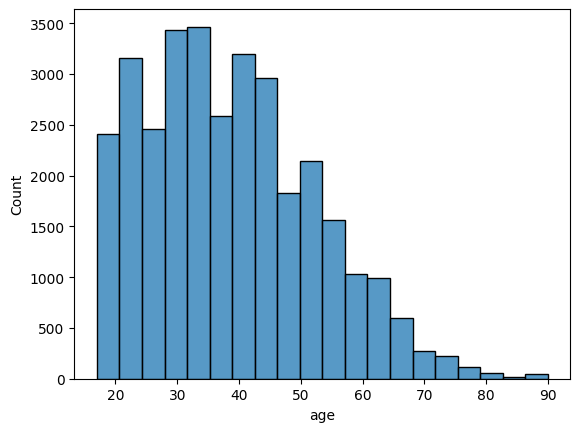

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics post-processing
print(initial_df.describe())

# Updated distribution plots
sns.histplot(initial_df['age'], bins=20)
plt.show()

# Correlation matrix
# plt.rcParams['figure.figsize']=(15,15) 
# sns.heatmap(initial_df.corr(), annot=True)
# plt.show()
# plt.title("Correlation between variables")


                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  31954.000000  3.195400e+04   31954.000000  31954.000000  31954.000000   
mean       0.000271  1.897187e+05      10.072260      0.010651     86.804500   
std        0.999825  1.057307e+05       2.559505      0.073014    401.738054   
min       -1.579482  1.228500e+04       1.000000      0.000000      0.000000   
25%       -0.774334  1.176272e+05       9.000000      0.000000      0.000000   
50%       -0.115576  1.783105e+05      10.000000      0.000000      0.000000   
75%        0.689572  2.373200e+05      12.000000      0.000000      0.000000   
max        3.763773  1.484705e+06      16.000000      1.000000   4356.000000   

       hours_per_week        salary  capital_gain_to_capital_loss  \
count    31954.000000  31954.000000                  31954.000000   
mean         0.402253      0.240752                      0.010651   
std          0.125967      0.427547                      0.073014   
min

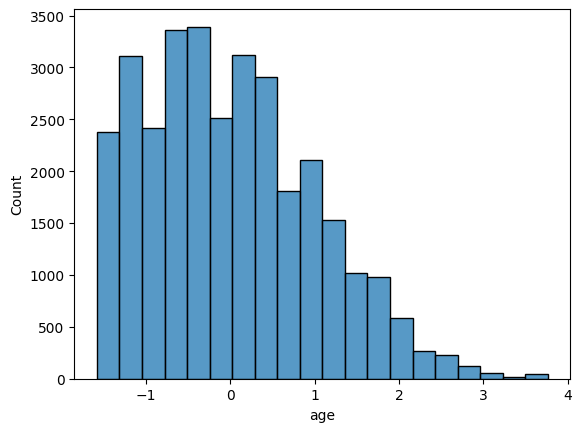

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Summary statistics post-processing
print(df_cleaned_enc.describe())

# Updated distribution plots
sns.histplot(df_cleaned_enc['age'], bins=20)
plt.show()

# Correlation matrix
# sns.heatmap(df_cleaned_enc.corr(), annot=False)
#sns.heatmap(df_cleaned_enc, cbar = True,  square = True, annot=True,annot_kws={'size': 15},  cmap= 'coolwarm')

#plt.show()

# Correlation matrix
# plt.rcParams['figure.figsize']=(15,15) 
# sns.heatmap(df_cleaned_enc.corr(), annot=True)
# plt.show()
# plt.title("Correlation between variables")


In [ ]:
sns.pairplot(df_cleaned_enc[:10])